In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/Melbourne_housing_FULL.csv')

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [20]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [6]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [7]:
df.shape

(34857, 21)

In [8]:
for C in df.columns:
    print(df[C].value_counts())

Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
Kew                467
Brighton           456
Brunswick          444
South Yarra        435
Hawthorn           428
Northcote          424
Camberwell         423
Balwyn North       420
Essendon           409
Coburg             405
Glenroy            400
Brighton East      393
Pascoe Vale        378
St Kilda           374
Port Melbourne     371
Malvern East       369
Prahran            336
Thornbury          322
Bentleigh          319
Balwyn             319
Yarraville         304
Surrey Hills       293
Elwood             288
Moonee Ponds       285
Hawthorn East      284
                  ... 
Hurstbridge          2
Wattle Glen          2
Upwey                2
Darley               2
Plenty               2
Montrose             2
Lynbrook             2
Silvan               2
Werribee South       2
Tecoma               2
Ferny Creek          1
Yarra Glen           1
Cranbourne 

In [15]:
df = df.drop(['Address'], axis=1)

ValueError: labels ['Address'] not contained in axis

In [16]:
values = {'Bedroom2': 0, 'Bathroom': 0, 'Car':0, 
          'Landsize': df.Landsize.mean(), 
          'BuildingArea': df.BuildingArea.mean(),
          'YearBuilt': df.YearBuilt.mean()}
df = df.fillna(value=values)

In [18]:
df = df.dropna()

In [22]:
df = pd.get_dummies(df)

In [25]:
df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train.loc[:, ~(df_train.columns).isin(['Price'])]
Y_train = df_train.Price
X_test = df_test.loc[:, ~(df_test.columns).isin(['Price'])]
Y_test = df_test.Price

In [24]:
df.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt',
       ...
       'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object', length=802)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
Y_rfc_pred = rfc.predict(X_test)
mean_squared_error(Y_test, Y_rfc_pred)

84672164401.375305

In [27]:
rfc.score(X_train, Y_train)

0.96133994606515849

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, Y_train)
Y_ridge_predict = ridge.predict(X_test)
mean_squared_error(Y_test, Y_ridge_predict)

184332777528.45767

In [29]:
ridge.score(X_train, Y_train)

0.70689995977974418

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
Y_gbr_predict = gbr.predict(X_test)
mean_squared_error(Y_test, Y_gbr_predict)

88839977792.76442

In [31]:
gbr.score(X_train, Y_train)

0.80966043581604108

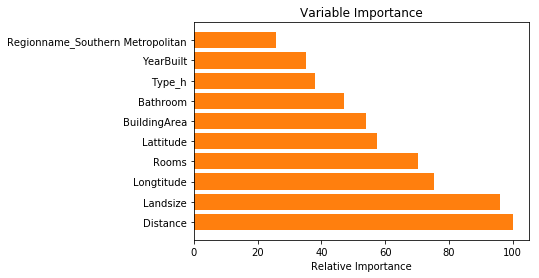

In [35]:
feature_importance = gbr.feature_importances_
import scipy
from sklearn import datasets
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[0:10], feature_importance[sorted_idx][0:10], align='center')
plt.yticks(pos[0:10], X_test.columns[sorted_idx][0:10])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Distance from the Central Hub of the city and land size are some of the most important.